# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**. You have 48 hours to complete the Midterm from the time you open it.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor as KNN1

from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve
import statsmodels.api as sm
from statsmodels.api import OLS
#import pydotplus
#import io
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from matplotlib import colors
from sklearn.feature_selection import RFE
import seaborn as sns
from pylab import savefig
sns.set_context("poster")
sns.set_palette("Set1", 8, .75)
%matplotlib inline

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`). <b>DONE</b>
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. <br><br>
<b>Should not use any of the variables that exist only for flights where there is a delay: 
 AIR_SYSTEM_DELAY,
 SECURITY_DELAY,
 AIRLINE_DELAY,
 LATE_AIRCRAFT_DELAY,
 WEATHER_DELAY. <br> Probably also do not want to use DEPARTURE_DELAY because this is not very helpful at predicting delays in advance. <br> And should likely only use one of DATE vs. DAY, MONTH, DAY_OF_WEEK, So will drop DATE, as day, month, and day of week are likely more valuable in future prediction.<br>
 Same for DISTANCE, SCHEDULED_TIME, and ELAPSED_TIME, which are all highly correlated, likely only need 1 and can drop the other 2 variables. Also ELAPSED_TIME is partially caused by the outcome, so we do not want to include that in the model-<br>
FLIGHT_NUMBER means different things across AIRLINES, and is a high dimension variable, so will want to look at data and decide whether it should be dropped. TAIL_NUMBER also provides information that is largely already captured by AIRLINE, DEPARTURE_TIME, DAY_OF_WEEK, etc. so may want to consider dropping.
 </b>
 <br>
 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.



In [2]:
#read in the data
df = pd.read_csv('cs109a_midterm.csv')
df.shape

(804941, 21)

# 1. Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).

In [3]:
#Question 1. Create a new variable, DELAY_OR_NOT:
df['DELAY_OR_NOT'] = np.where(df['ARRIVAL_DELAY'] >= 15, 1,0)

# 2. Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
ANSWER: Should not use any of the variables that exist only for flights where there is a delay: 
 AIR_SYSTEM_DELAY,
 SECURITY_DELAY,
 AIRLINE_DELAY,
 LATE_AIRCRAFT_DELAY,
 WEATHER_DELAY. <br> Probably also do not want to use DEPARTURE_DELAY because this is not very helpful at predicting delays in advance. <br> And should likely only use one of DATE vs. DAY, MONTH, DAY_OF_WEEK, So will drop DATE, as day, month, and day of week are likely more valuable in future prediction.<br>
 Same for DISTANCE, SCHEDULED_TIME, and ELAPSED_TIME, which are all highly correlated, likely only need 1 and can drop the other 2 variables. Also ELAPSED_TIME is partially caused by the outcome, so we do not want to include that in the model.<br>
FLIGHT_NUMBER means different things across AIRLINES, and is a high dimension variable, so will want to look at data and decide whether it should be dropped. TAIL_NUMBER also provides information that is largely already captured by AIRLINE, DEPARTURE_TIME, DAY_OF_WEEK, etc. so may want to consider dropping.

In [4]:
def time_to_num(time_str):
    hh, mm , ss = map(int, time_str.split(':'))
    return mm + 60*hh
time = []
for i in range(0,804941):
    time.append(time_to_num(df.SCHED_DEP.iloc[i]))
se = pd.Series(time)
df['DEP_TIME'] = se.values


In [5]:
df.columns

Index(['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP',
       'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT',
       'DEP_TIME'],
      dtype='object')

In [6]:
df.shape

(804941, 23)

In [7]:
def train_validate_test_split(df, train_percent=.15, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [11]:
# check to see if arrival time is very correlated with departure time 
# and if it has a stronger association with being delayed
arrtime = []
for i in range(0,804941):
    arrtime.append(time_to_num(df.SCHED_ARR.iloc[i]))
arrt = pd.Series(arrtime)
df['ARR_TIME'] = arrt.values  

In [12]:
def cat_orig_air(row):
    if row['ORIGIN_AIRPORT'] == 'ATL':
        val = 'ATL'
    elif row['ORIGIN_AIRPORT'] == 'BOS':
        val = 'BOS'
    elif row['ORIGIN_AIRPORT'] == 'JFK':
        val = 'JFK'
    elif row['ORIGIN_AIRPORT'] == 'LAX':
        val = 'LAX'
    elif row['ORIGIN_AIRPORT'] == 'MSY':
        val = 'MSY'
    elif row['ORIGIN_AIRPORT'] == 'ORD':
        val = 'ORD'
    else:
        val = 'Other'
    return val
df['ORIGIN_AP_CAT'] = df.apply(cat_orig_air, axis=1)

In [13]:
def cat_des_air(row):
    if row['DESTINATION_AIRPORT'] == 'ATL':
        val = 'ATL'
    elif row['DESTINATION_AIRPORT'] == 'BOS':
        val = 'BOS'
    elif row['DESTINATION_AIRPORT'] == 'JFK':
        val = 'JFK'
    elif row['DESTINATION_AIRPORT'] == 'LAX':
        val = 'LAX'
    elif row['DESTINATION_AIRPORT'] == 'MSY':
        val = 'MSY'
    elif row['DESTINATION_AIRPORT'] == 'ORD':
        val = 'ORD'
    else:
        val = 'Other'
    return val
df['DEST_AP_CAT'] = df.apply(cat_des_air, axis=1)

In [14]:
train, test, total = train_validate_test_split(df, seed=9001)

In [15]:
print(train.shape)
train.describe()

(120741, 26)


,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,DEP_TIME,ARR_TIME
count,120741.000000,120741.000000,120741.000000,120741.000000,120741.000000,120741.000000,120741.000000,120741.000000,120741.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,120741.000000,120741.000000,120741.000000
mean,6.658774,15.729189,3.958018,2159.324919,4.386207,-1.359803,813.653573,140.536197,134.790187,13.512262,0.039548,17.463537,24.959558,2.311515,0.101987,770.980330,882.559835
std,3.386100,8.773236,2.000783,1739.548307,27.542576,29.880063,600.012813,74.317754,72.881885,27.203596,0.972026,46.511037,42.539746,14.804547,0.302632,282.451171,290.914726
min,1.000000,1.000000,1.000000,1.000000,-38.000000,-74.000000,31.000000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,8.000000,2.000000,740.000000,-5.000000,-14.000000,372.000000,85.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,530.000000,651.000000
50%,7.000000,16.000000,4.000000,1696.000000,-2.000000,-7.000000,644.000000,121.000000,116.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000,750.000000,876.000000
75%,10.000000,23.000000,6.000000,3175.000000,3.000000,3.000000,1050.000000,172.000000,166.000000,17.000000,0.000000,17.000000,32.000000,0.000000,0.000000,1000.000000,1115.000000
max,12.000000,31.000000,7.000000,7438.000000,1458.000000,1456.000000,4983.000000,679.000000,683.000000,440.000000,64.000000,1456.000000,592.000000,397.000000,1.000000,1439.000000,1439.000000


In [16]:
train[train.DELAY_OR_NOT == 0].isnull().sum()

DATE                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHED_DEP                   0
SCHED_ARR                   0
DEPARTURE_DELAY             0
ARRIVAL_DELAY               0
DISTANCE                    0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_SYSTEM_DELAY       108427
SECURITY_DELAY         108427
AIRLINE_DELAY          108427
LATE_AIRCRAFT_DELAY    108427
WEATHER_DELAY          108427
DELAY_OR_NOT                0
DEP_TIME                    0
ARR_TIME                    0
ORIGIN_AP_CAT               0
DEST_AP_CAT                 0
dtype: int64

In [17]:
#train['DELAY_OR_NOT'].groupby(train['TAIL_NUMBER']).count().nlargest(100).index

In [18]:
#print('AIRLINE codes:',train.AIRLINE.unique())
origin = train.ORIGIN_AIRPORT.unique().shape #610 train 603 test #628
dest = train.DESTINATION_AIRPORT.unique().shape #609 unique airpot identifiers #627
train.FLIGHT_NUMBER.unique().shape #6480 unique flight #'s
train.TAIL_NUMBER.unique().shape #4667 unique tail #'s #4819
train.SCHEDULED_TIME.unique().shape #dep: 1224, time: 486
mo=train['DELAY_OR_NOT'].groupby(train['TAIL_NUMBER']).count()

In [19]:
tails = pd.crosstab(train.AIRLINE, train.TAIL_NUMBER)
print (tails)

TAIL_NUMBER  7819A  7820L  D942DN  N001AA  N002AA  N003AA  N004AA  N005AA  \
AIRLINE                                                                     
AA               0      0       0       7      22       8      16      18   
AS               0      0       0       0       0       0       0       0   
B6               0      0       0       0       0       0       0       0   
DL               0      0       1       0       0       0       0       0   
EV               0      0       0       0       0       0       0       0   
F9               0      0       0       0       0       0       0       0   
HA               0      0       0       0       0       0       0       0   
MQ               0      0       0       0       0       0       0       0   
NK               0      0       0       0       0       0       0       0   
OO               0      0       0       0       0       0       0       0   
UA               0      0       0       0       0       0       0       0   

# 3. Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

Delays do vary across airline, time of departure, and airport.

## 3a. Visualize Predictors with Binary Outcome (Whether a Flight is Delayed)

In [20]:
pd_mo = train['DELAY_OR_NOT'].groupby(train['MONTH']).mean()
pd_day = train['DELAY_OR_NOT'].groupby(train['DAY']).mean()
pd_dwk = train['DELAY_OR_NOT'].groupby(train['DAY_OF_WEEK']).mean()
pd_air = train['DELAY_OR_NOT'].groupby(train['AIRLINE']).mean()
pd_oap = train['DELAY_OR_NOT'].groupby(train['ORIGIN_AP_CAT']).mean()
pd_dap = train['DELAY_OR_NOT'].groupby(train['DEST_AP_CAT']).mean()
pct_delay = [pd_mo, pd_day, pd_dwk, pd_air, pd_oap, pd_dap]

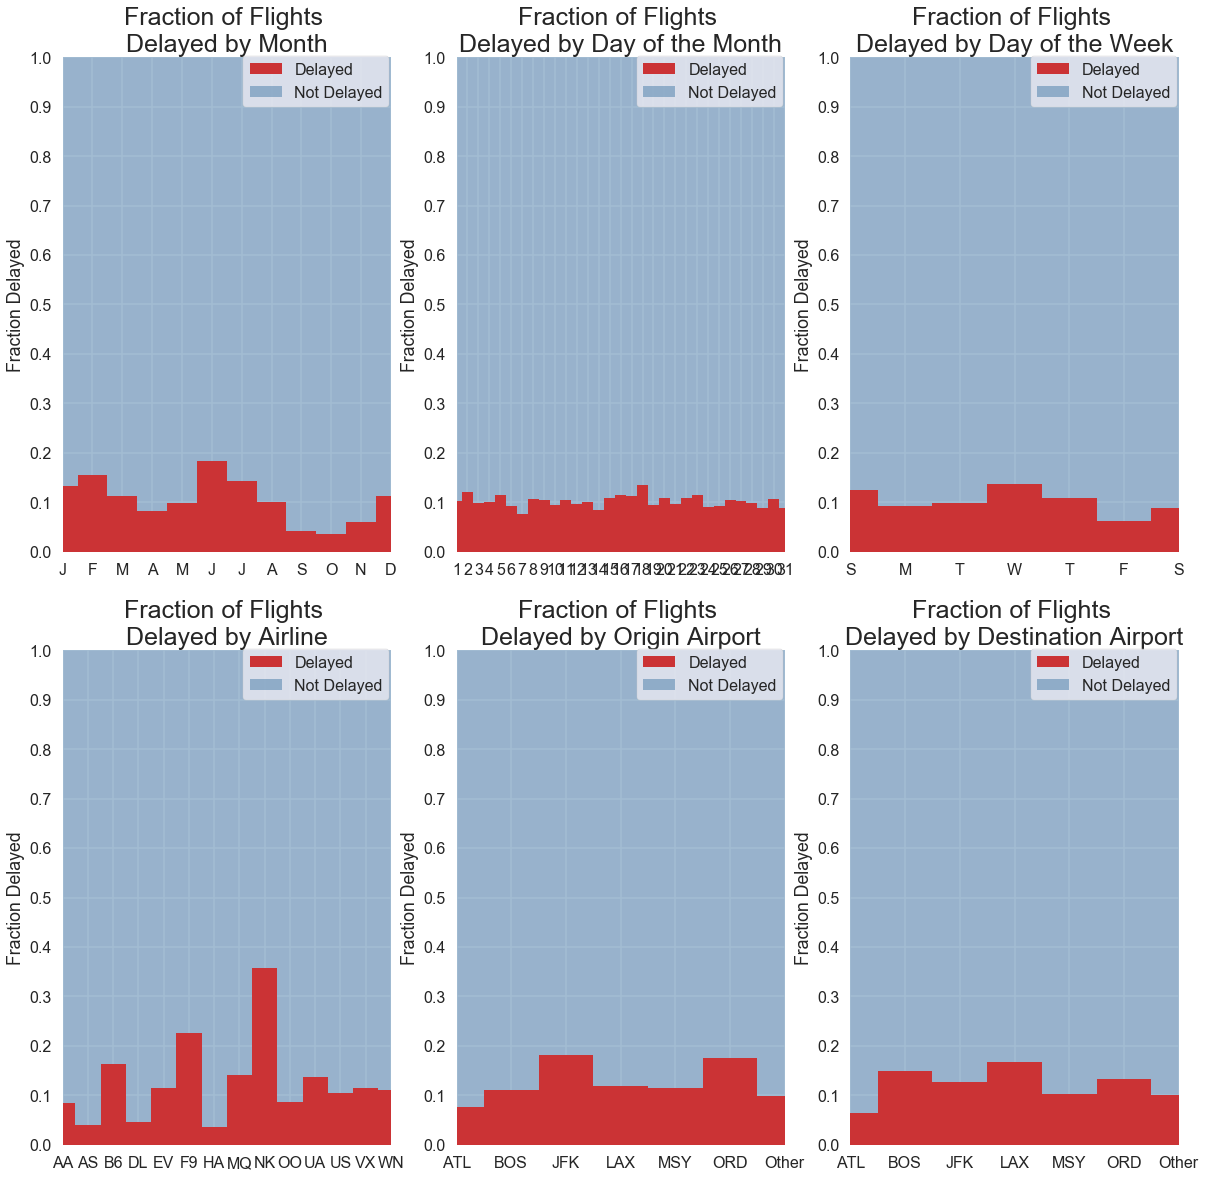

In [21]:
lenlist=[12,31,7,14,7,7]
number_of_rows = int(np.ceil(len(lenlist) / 3))
fig, ax = plt.subplots(number_of_rows, 3, figsize=(20, 20))

lablist=[['J', 'F', 'M','A', 'M', 'J', 'J', 'A','S', 'O', 'N', 'D'], 
         np.arange(1,32,1),
         ['S','M','T','W','T','F','S'],
         ['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN'],
         ['ATL','BOS','JFK','LAX','MSY','ORD','Other'],
         ['ATL','BOS','JFK','LAX','MSY','ORD','Other']]
title = ['Month', 'Day of the Month', 'Day of the Week', 'Airline', 'Origin Airport', 'Destination Airport']
    
for i, k in enumerate(title):
    ax[i // 3, i % 3].bar(range(1,lenlist[i]+1), pct_delay[i], width=1, color='C8', label='Delayed')
    ax[i // 3, i % 3].bar(range(1,lenlist[i]+1), 1-pct_delay[i], width=1, label='Not Delayed',
             bottom=pct_delay[i], color='C9', alpha=.5)

    ax[i // 3, i % 3].set_ylabel('Fraction Delayed')
    ax[i // 3, i % 3].set_title('Fraction of Flights \nDelayed by {}'.format(k), fontsize='25')
    ax[i // 3, i % 3].legend(loc=(.55,.9), frameon = True, fancybox=True)
    ax[i // 3, i % 3].set_xticks(range(1,len(lablist[i])+1))
    ax[i // 3, i % 3].set_xticklabels(lablist[i])
    ax[i // 3, i % 3].set_xlim(1,lenlist[i])
    ax[i // 3, i % 3].set_yticks(np.arange(0, 1.1, .1))
    ax[i // 3, i % 3].set_ylim(0,1)

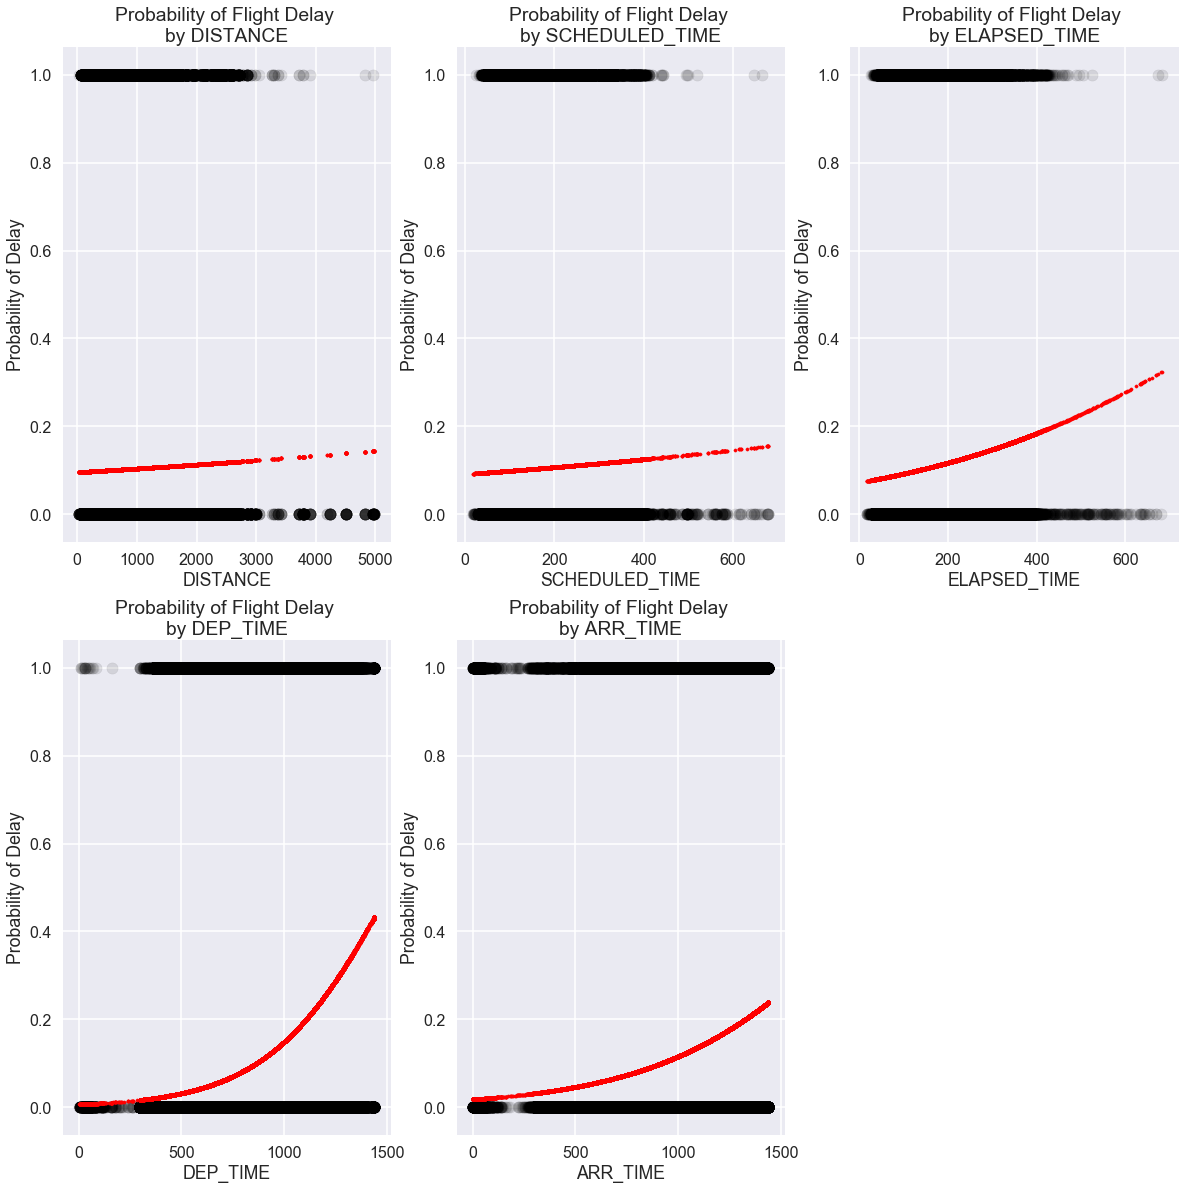

In [22]:
f, ax = plt.subplots(2, 3, figsize=(20,20))
x = train['DISTANCE'].values.reshape(-1,1)
logitm = LogisticRegression(C = 1000000)
logitm.fit(x, train["DELAY_OR_NOT"])

x1 = train['SCHEDULED_TIME'].values.reshape(-1,1)
logitm1 = LogisticRegression(C = 1000000)
logitm1.fit(x1, train["DELAY_OR_NOT"])

x2 = train['ELAPSED_TIME'].values.reshape(-1,1)
logitm2 = LogisticRegression(C = 1000000)
logitm2.fit(x2, train["DELAY_OR_NOT"])

x3 = train['DEP_TIME'].values.reshape(-1,1)
logitm3 = LogisticRegression(C = 1000000)
logitm3.fit(x3, train["DELAY_OR_NOT"])

x4 = train['ARR_TIME'].values.reshape(-1,1)
logitm4 = LogisticRegression(C = 1000000)
logitm4.fit(x4, train["DELAY_OR_NOT"])

pred_list = [logitm.predict_proba(x)[:,1], logitm1.predict_proba(x1)[:,1], 
             logitm2.predict_proba(x2)[:,1], logitm3.predict_proba(x3)[:,1],
             logitm4.predict_proba(x4)[:,1]]
x_list = [x, x1, x2, x3, x4]
title = ['DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'DEP_TIME', 'ARR_TIME']

for i, x in enumerate(title):

    ax[i // 3, i % 3].scatter(train[x], train.DELAY_OR_NOT, color='black', alpha=.1)
    ax[i // 3, i % 3].scatter(x_list[i], pred_list[i],  color='red', s=10)

    ax[i // 3, i % 3].set_ylabel('Probability of Delay')
    ax[i // 3, i % 3].set_title('Probability of Flight Delay \nby {}'.format(x))
    ax[i // 3, i % 3].set_xlabel('{}'.format(x))
f.delaxes(ax.flatten()[5])

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


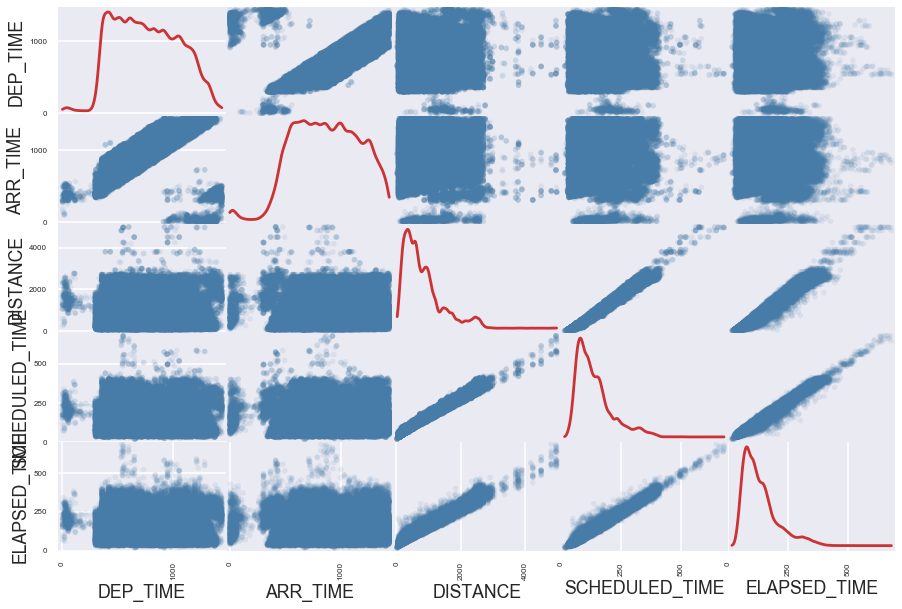

In [23]:
from pandas.plotting import scatter_matrix
fig1, ax1 = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(train[['DEP_TIME', 'ARR_TIME', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME']],
                      alpha=0.1, color='C9', diagonal='kde', ax=ax1)
plt.show()

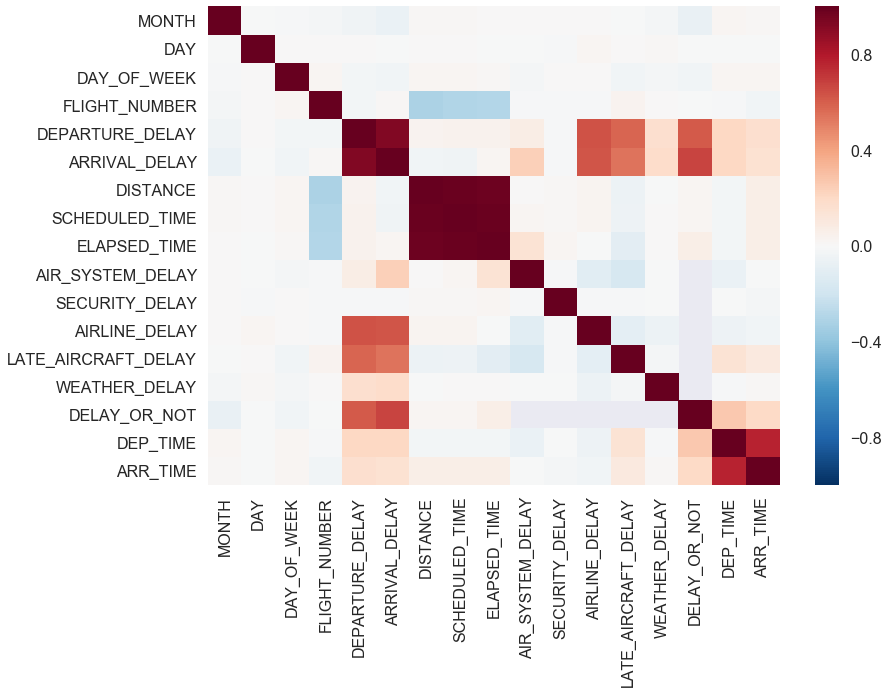

In [24]:
sns.set_context("poster")
sns.heatmap(train.corr())
plt.show()

# 4. Build a classification model that classifies delays according to DELAY_OR_NOT.

In [25]:
numerical_columns = ['DISTANCE', 'DEP_TIME']
mean = train[numerical_columns].mean()
std = train[numerical_columns].std()

train[numerical_columns] = (train[numerical_columns] - mean)/std
test[numerical_columns] = (test[numerical_columns] - mean)/std

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [26]:
test.columns

Index(['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP',
       'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT',
       'DEP_TIME', 'ARR_TIME', 'ORIGIN_AP_CAT', 'DEST_AP_CAT'],
      dtype='object')

In [27]:
#drop unnecessary predictor variables
train.drop(['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
            'SCHED_DEP','SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
        'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
        'ARR_TIME'], axis = 1, inplace = True)
test.drop(['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
            'SCHED_DEP','SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 
           'ARR_TIME'], axis = 1, inplace = True)
total.drop(['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 
            'SCHED_DEP','SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 
        'ARR_TIME'], axis = 1, inplace = True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
categorical_columns_g2cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train1 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
test1 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
x = train1.loc[:, ~train1.columns.isin(['DELAY_OR_NOT'])]  
y = train1['DELAY_OR_NOT']
X_test = test1.loc[:, ~test1.columns.isin(['DELAY_OR_NOT'])]  
y_test = test1['DELAY_OR_NOT']

In [29]:
# first round of model comparison by running models (with out of the box parameter settings) 
# on the training data and eliminating models which performed very poorly.

def expected_score(model, x_test, y_test):
    overall = 0
    class_0 = 0
    class_1 = 0
    for i in range(100):
        sample = np.random.choice(len(x_test), len(x_test))
        x_sub_test = x_test[sample]
        y_sub_test = y_test[sample]
        
        overall += model.score(x_sub_test, y_sub_test)
        class_0 += model.score(x_sub_test[y_sub_test==0], y_sub_test[y_sub_test==0])
        class_1 += model.score(x_sub_test[y_sub_test==1], y_sub_test[y_sub_test==1])

    return pd.Series([overall / 100., 
                      class_0 / 100.,
                      class_1 / 100.],
                      index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])], 
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

In [30]:
#KNN
knn = KNN(n_neighbors=2)
knn.fit(x, y)
knn_scores = score(knn, x, y)
print('knn')

#Unweighted logistic regression
unweighted_logistic = LogisticRegression(C=10)
unweighted_logistic.fit(x, y)
unweighted_log_scores = score(unweighted_logistic, x, y)
print('unweighted log')

#LDA
lda = LDA()
lda.fit(x, y)
lda_scores = score(lda, x, y)
print('lda')

#QDA
qda = QDA()
qda.fit(x, y)
qda_scores = score(qda, x, y)
print('qda')

#Decision Tree
tree = DecisionTree(max_depth=50, class_weight='balanced', criterion='entropy')
tree.fit(x, y)
tree_scores = score(tree, x, y)
print('tree')

knn
unweighted log
lda
qda
tree


In [31]:
#Score Dataframe
score_df = pd.DataFrame({'knn': knn_scores, 
                         'unweighted logistic': unweighted_log_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores})
score_df

,knn,lda,qda,tree,unweighted logistic
overall accuracy,0.931978,0.906867,0.776853,0.992877,0.907504
accuracy on class 0,1.000000,0.990713,0.801369,0.992271,0.991681
accuracy on class 1,0.333036,0.168589,0.560987,0.998213,0.166315


In [32]:
knn_scorest = score(knn, X_test, y_test)
unweighted_log_scorest = score(unweighted_logistic, X_test, y_test)
lda_scorest = score(lda, X_test, y_test)
qda_scorest = score(qda, X_test, y_test)
tree_scorest = score(tree, X_test, y_test)

In [33]:
score_df_test = pd.DataFrame({'knn': knn_scorest, 
                         'unweighted logistic': unweighted_log_scorest,
                         'lda': lda_scorest,
                         'qda': qda_scorest,
                         'tree': tree_scorest})
score_df_test

,knn,lda,qda,tree,unweighted logistic
overall accuracy,0.902477,0.905583,0.774219,0.855915,0.906689
accuracy on class 0,0.987594,0.990128,0.800396,0.911662,0.991402
accuracy on class 1,0.159231,0.167332,0.545641,0.369121,0.166969


### Choose logistic regression and use AUC in test set with a type of backwards selection to determine best model

Assuming:
The independent variables are independent of each other. That is, the model should have little or no multicollinearity.
The independent variables are linearly related to the log odds of an airplane delay.

In [34]:
# create validation set for manually 
# choosing variables to include in logistic regression model
train1_0 = train.copy()
np.random.seed(9001)
msk = np.random.rand(len(train1_0)) < 0.75
train = train1_0[msk]
valid = train1_0[~msk]

In [35]:
train.shape

(90910, 9)

In [36]:
categorical_columns_g2cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train1 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid1 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test1 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)

In [37]:
train1.columns

Index(['DISTANCE', 'DELAY_OR_NOT', 'DEP_TIME', 'MONTH_2', 'MONTH_3', 'MONTH_4',
       'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10',
       'MONTH_11', 'MONTH_12', 'DAY_2', 'DAY_3', 'DAY_4', 'DAY_5', 'DAY_6',
       'DAY_7', 'DAY_8', 'DAY_9', 'DAY_10', 'DAY_11', 'DAY_12', 'DAY_13',
       'DAY_14', 'DAY_15', 'DAY_16', 'DAY_17', 'DAY_18', 'DAY_19', 'DAY_20',
       'DAY_21', 'DAY_22', 'DAY_23', 'DAY_24', 'DAY_25', 'DAY_26', 'DAY_27',
       'DAY_28', 'DAY_29', 'DAY_30', 'DAY_31', 'DAY_OF_WEEK_2',
       'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6',
       'DAY_OF_WEEK_7', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV',
       'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO',
       'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN',
       'ORIGIN_AP_CAT_BOS', 'ORIGIN_AP_CAT_JFK', 'ORIGIN_AP_CAT_LAX',
       'ORIGIN_AP_CAT_MSY', 'ORIGIN_AP_CAT_ORD', 'ORIGIN_AP_CAT_Other',
       'DEST_AP_CAT_BOS', 'DEST_AP_CAT_JF

### With all predictors considered possibly important 

In [38]:
X_train = train1.loc[:, ~train1.columns.isin(['DELAY_OR_NOT'])]  
y_train = train1['DELAY_OR_NOT']
X_valid = valid1.loc[:, ~valid1.columns.isin(['DELAY_OR_NOT'])]  
y_valid = valid1['DELAY_OR_NOT']
X_test = test1.loc[:, ~test1.columns.isin(['DELAY_OR_NOT'])]  
y_test = test1['DELAY_OR_NOT']

In [39]:
cvals = list(np.power(10.0, np.arange(-10, 2)))
logregcv = LogisticRegressionCV(Cs=cvals,refit=True,cv=5,fit_intercept=True,penalty='l2')
logregcv.fit(X_train, y_train)
print('Best C value:', logregcv.C_)

Best C value: [ 10.]


In [40]:
logregcv.coef_.shape

(1, 74)

In [41]:
def plot_ROC(X_test, y_test, logregcv, subtitle):
    preds = logregcv.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, [0 for y in y_test])
    roc_auc_2 = auc(fpr_2, tpr_2)
    plt.figure(figsize=(20,10))
    lw = 2
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
    plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([-0.02, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic in {}'.format(subtitle))
    plt.legend(loc="lower right", prop={'size':20})
    plt.show()

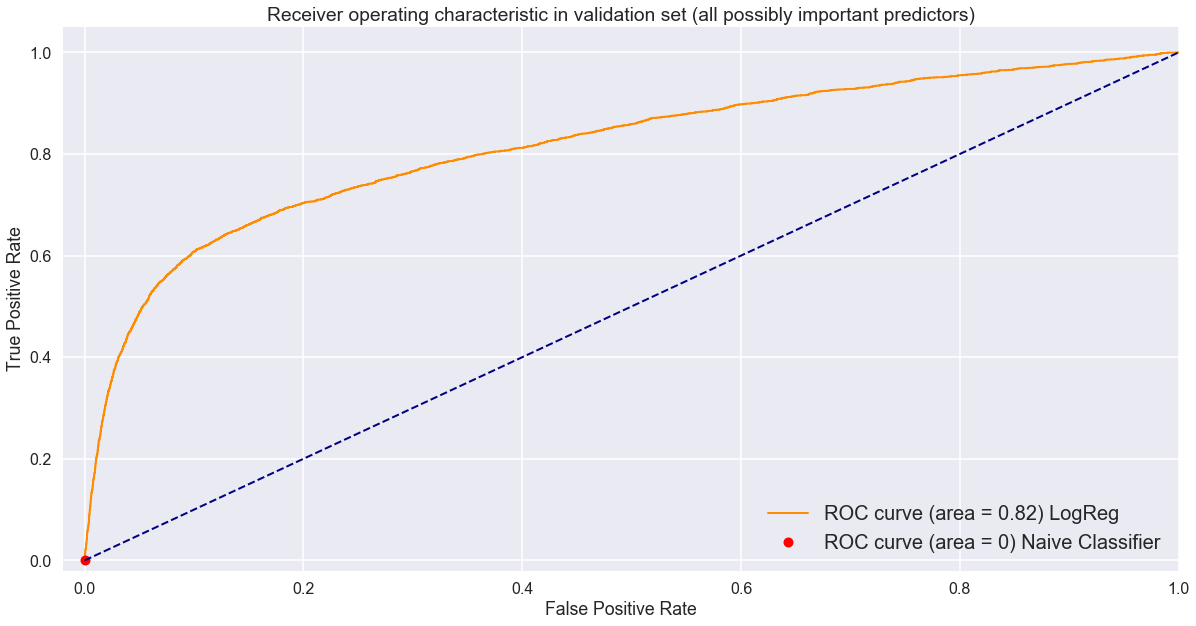

In [42]:
plot_ROC(X_valid, y_valid, logregcv, 'validation set (all possibly important predictors)')

### Without Distance

In [43]:
X_train1 = train1.loc[:, ~train1.columns.isin(['DELAY_OR_NOT', 'DISTANCE'])]  
X_valid1 = valid1.loc[:, ~valid1.columns.isin(['DELAY_OR_NOT', 'DISTANCE'])] 
X_test1 = test1.loc[:, ~test1.columns.isin(['DELAY_OR_NOT', 'DISTANCE'])]  

Best C value: [ 10.]


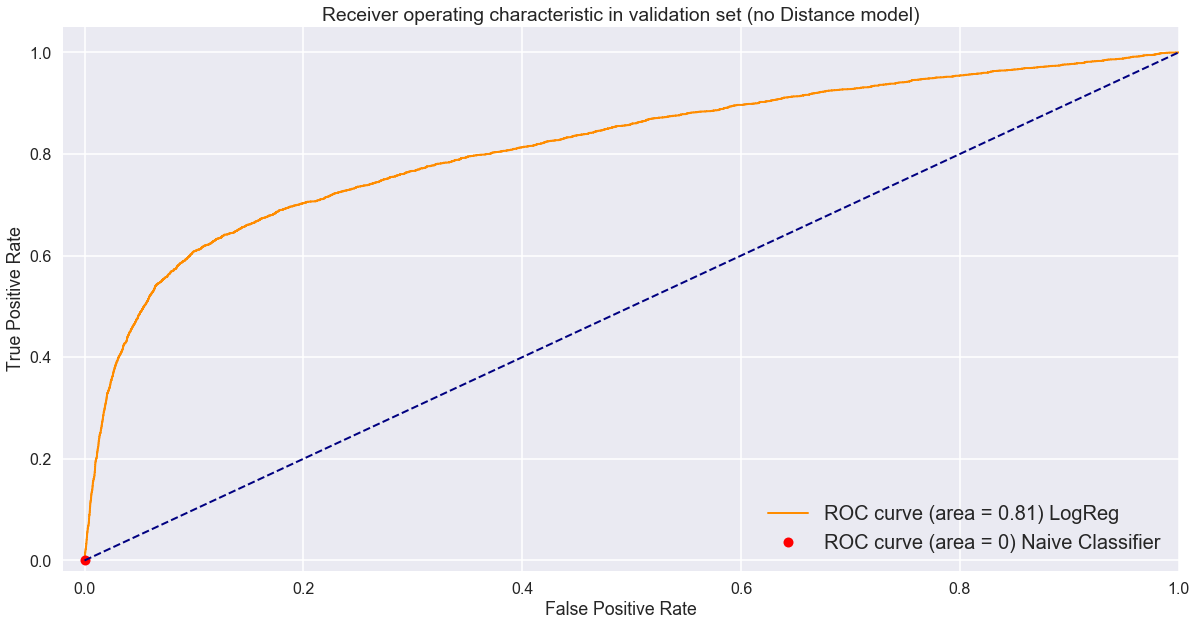

In [44]:
logregcv1 = LogisticRegressionCV(Cs=cvals,refit=True,cv=5,fit_intercept=True,penalty='l2')
logregcv1.fit(X_train1, y_train)
print('Best C value:', logregcv1.C_)
plot_ROC(X_valid1, y_valid, logregcv1, 'validation set (no Distance model)')

### Without Departure Time

In [45]:
X_train2 = train1.loc[:, ~train1.columns.isin(['DELAY_OR_NOT', 'DEP_TIME'])]  
X_valid2 = valid1.loc[:, ~valid1.columns.isin(['DELAY_OR_NOT', 'DEP_TIME'])] 
X_test2 = test1.loc[:, ~test1.columns.isin(['DELAY_OR_NOT','DEP_TIME'])]  

Best C value: [ 10.]


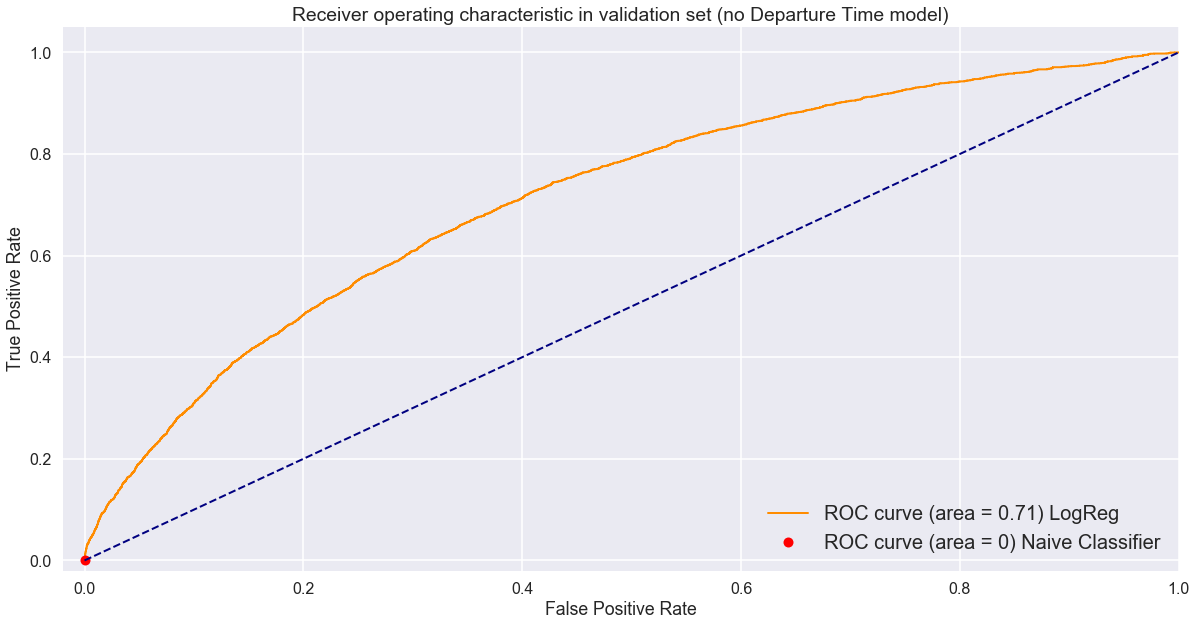

In [46]:
logregcv2 = LogisticRegressionCV(Cs=cvals, refit=True, cv=5, fit_intercept=True, penalty='l2')
logregcv2.fit(X_train2, y_train)
print('Best C value:', logregcv2.C_)
plot_ROC(X_valid2, y_valid, logregcv2, 'validation set (no Departure Time model)')

### Without Origin Airport

In [47]:
categorical_columns_g2cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE','DEST_AP_CAT']
train2 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid2 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test2 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train3 = train2.loc[:, ~train2.columns.isin(['DELAY_OR_NOT', 'ORIGIN_AP_CAT'])]  
X_valid3 = valid2.loc[:, ~valid2.columns.isin(['DELAY_OR_NOT', 'ORIGIN_AP_CAT'])] 
X_test3 = test2.loc[:, ~test2.columns.isin(['DELAY_OR_NOT', 'ORIGIN_AP_CAT'])]  

Best C value: [ 10.]


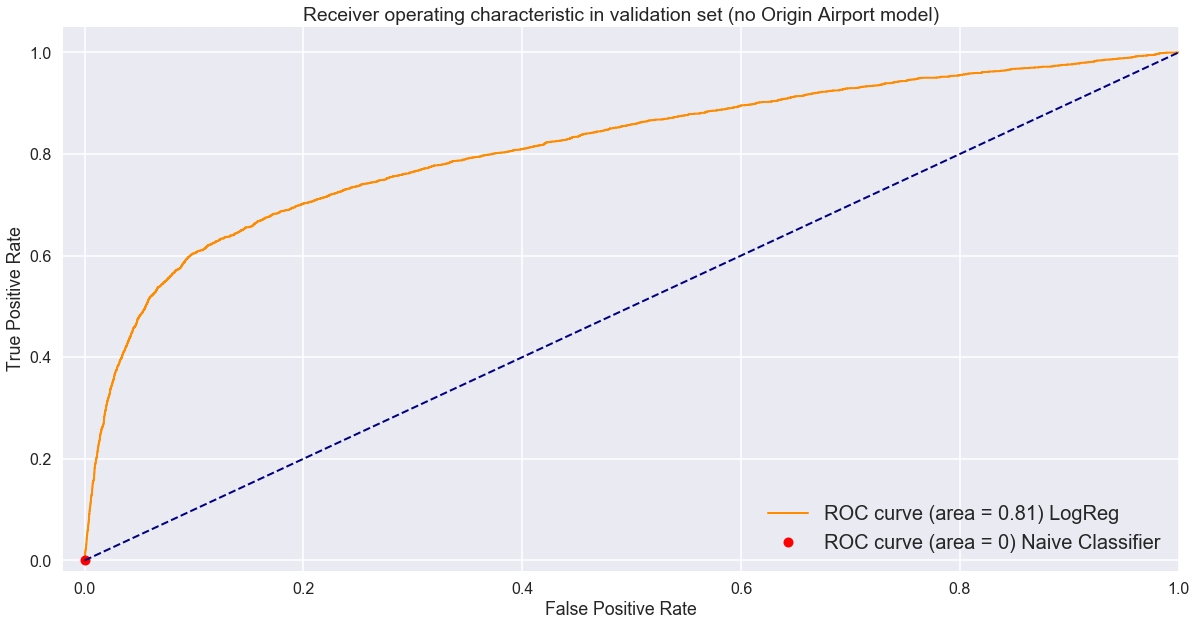

In [48]:
logregcv3 = LogisticRegressionCV(Cs=cvals, refit=True,cv=5, fit_intercept=True, penalty='l2')
logregcv3.fit(X_train3, y_train)
print('Best C value:', logregcv3.C_)
plot_ROC(X_valid3, y_valid, logregcv3, 'validation set (no Origin Airport model)')

### Without Month

In [49]:
categorical_columns_g2cols = ['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train3 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid3 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test3 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train4 = train3.loc[:, ~train3.columns.isin(['DELAY_OR_NOT', 'MONTH'])]  
X_valid4 = valid3.loc[:, ~valid3.columns.isin(['DELAY_OR_NOT', 'MONTH'])]  
X_test4 = test3.loc[:, ~test3.columns.isin(['DELAY_OR_NOT', 'MONTH'])]  

Best C value: [ 1.]


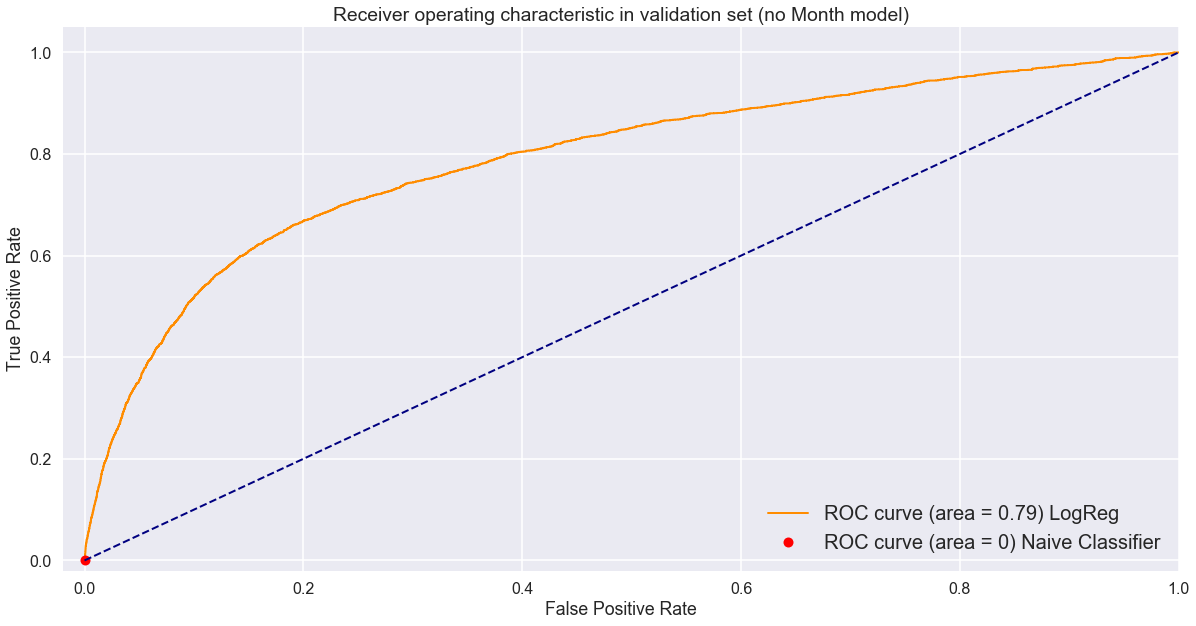

In [50]:
logregcv4 = LogisticRegressionCV(Cs=cvals,refit=True,cv=5,fit_intercept=True,penalty='l2')
logregcv4.fit(X_train4, y_train)
print('Best C value:', logregcv4.C_)
plot_ROC(X_valid4, y_valid, logregcv4, 'validation set (no Month model)')

### Without Day

In [51]:
categorical_columns_g2cols = ['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train4 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid4 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test4 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train5 = train4.loc[:, ~train4.columns.isin(['DELAY_OR_NOT', 'DAY'])]  
X_valid5 = valid4.loc[:, ~valid4.columns.isin(['DELAY_OR_NOT', 'DAY'])] 
X_test5 = test4.loc[:, ~test4.columns.isin(['DELAY_OR_NOT',  'DAY'])]  

Best C value: [ 10.]


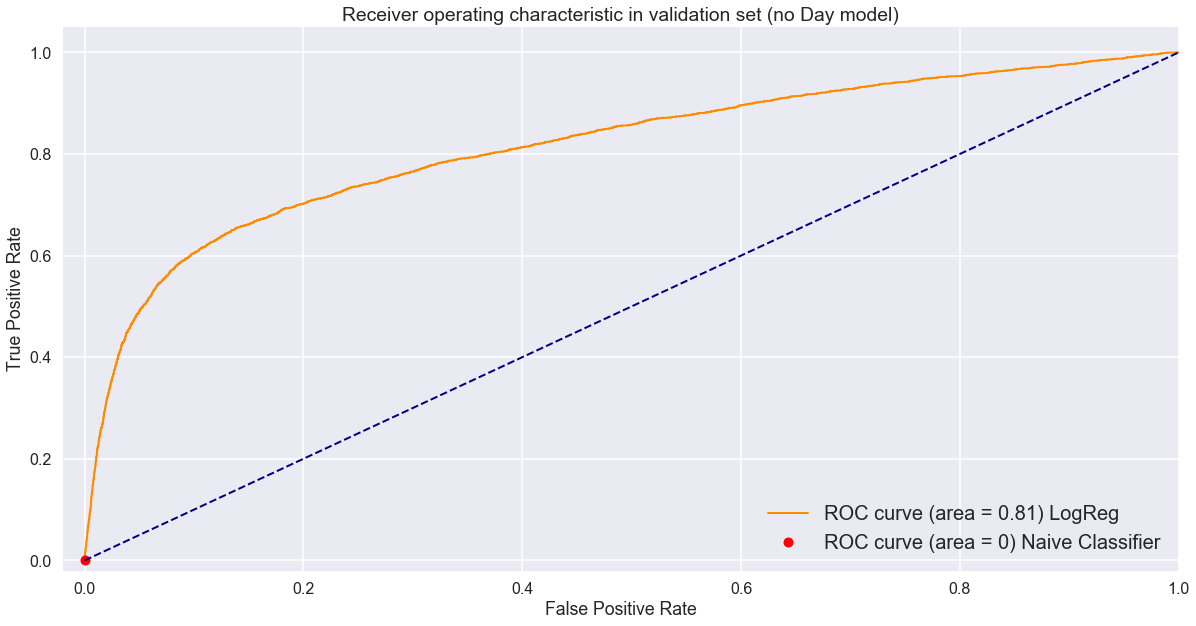

In [52]:
logregcv5 = LogisticRegressionCV(Cs=cvals, refit=True, cv=5, fit_intercept=True, penalty='l2')
logregcv5.fit(X_train5, y_train)
print('Best C value:', logregcv5.C_)
plot_ROC(X_valid5, y_valid, logregcv5, 'validation set (no Day model)')

### Without Day of Week

In [53]:
categorical_columns_g2cols = ['MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train5 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid5 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test5 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train6 = train5.loc[:, ~train5.columns.isin(['DELAY_OR_NOT','DAY_OF_WEEK'])]  
X_valid6 = valid5.loc[:, ~valid5.columns.isin(['DELAY_OR_NOT','DAY_OF_WEEK'])]  
X_test6 = test5.loc[:, ~test5.columns.isin(['DELAY_OR_NOT', 'DAY_OF_WEEK'])] 

Best C value: [ 10.]


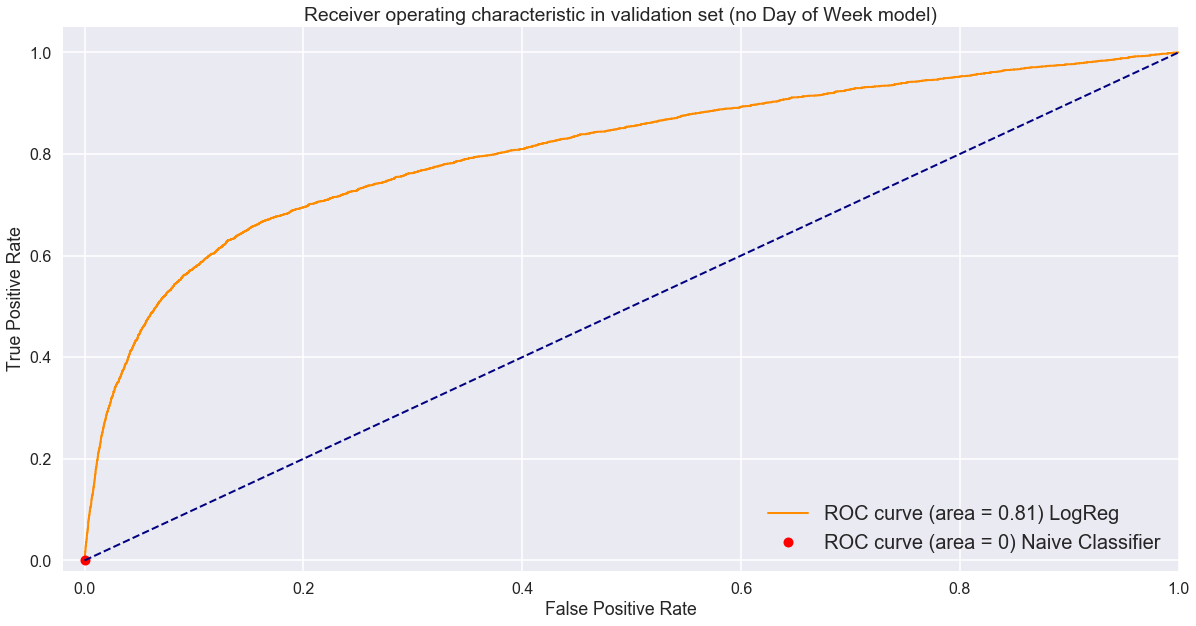

In [54]:
logregcv6 = LogisticRegressionCV(Cs=cvals, refit=True, cv=5, fit_intercept=True, penalty='l2')
logregcv6.fit(X_train6, y_train)
print('Best C value:', logregcv6.C_)
plot_ROC(X_valid6, y_valid, logregcv6, 'validation set (no Day of Week model)')

### Without Airline

In [55]:
categorical_columns_g2cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train6 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid6 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test6 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train7 = train6.loc[:, ~train6.columns.isin(['DELAY_OR_NOT','AIRLINE'])]  
X_valid7 = valid6.loc[:, ~valid6.columns.isin(['DELAY_OR_NOT','AIRLINE'])] 
X_test7 = test6.loc[:, ~test6.columns.isin(['DELAY_OR_NOT', 'AIRLINE'])]  

Best C value: [ 10.]


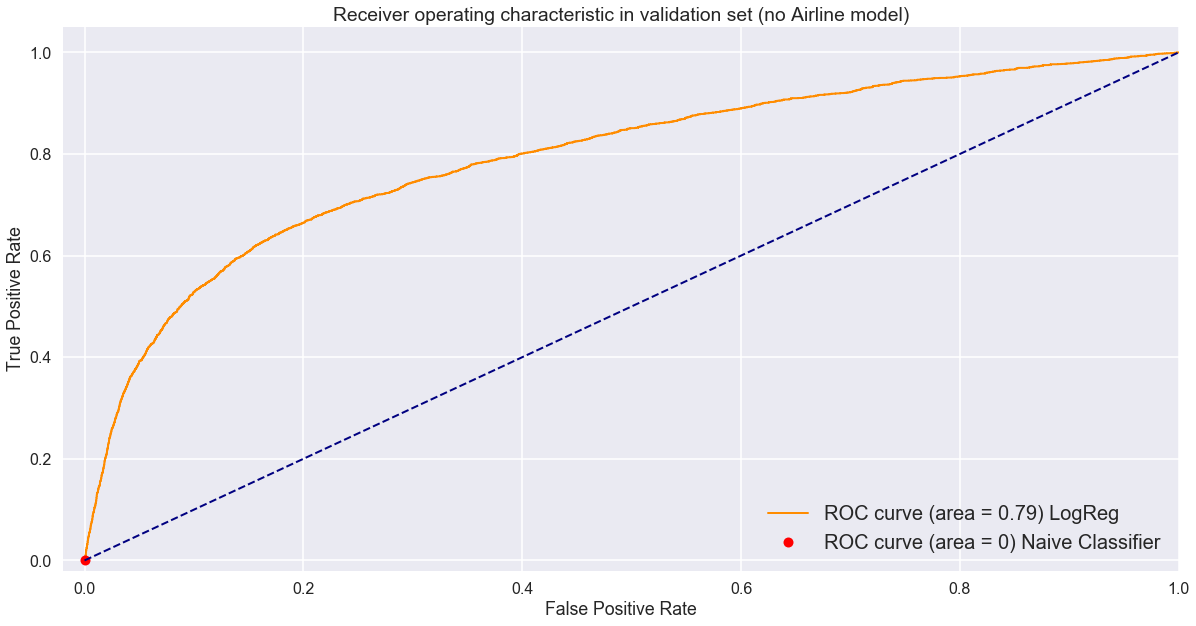

In [56]:
logregcv7 = LogisticRegressionCV(Cs=cvals, refit=True, cv=5, fit_intercept=True, penalty='l2')
logregcv7.fit(X_train7, y_train)
print('Best C value:', logregcv7.C_)
plot_ROC(X_valid7, y_valid, logregcv7, 'validation set (no Airline model)')

### Without Day and Distance

In [57]:
categorical_columns_g2cols = ['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']
train7 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid7 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test7 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train8 = train7.loc[:, ~train7.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE'])]  
X_valid8 = valid7.loc[:, ~valid7.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE'])]  
X_test8 = test7.loc[:, ~test7.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE'])]  

In [58]:
X_train8.shape

(90910, 43)

Best C value: [ 1.]


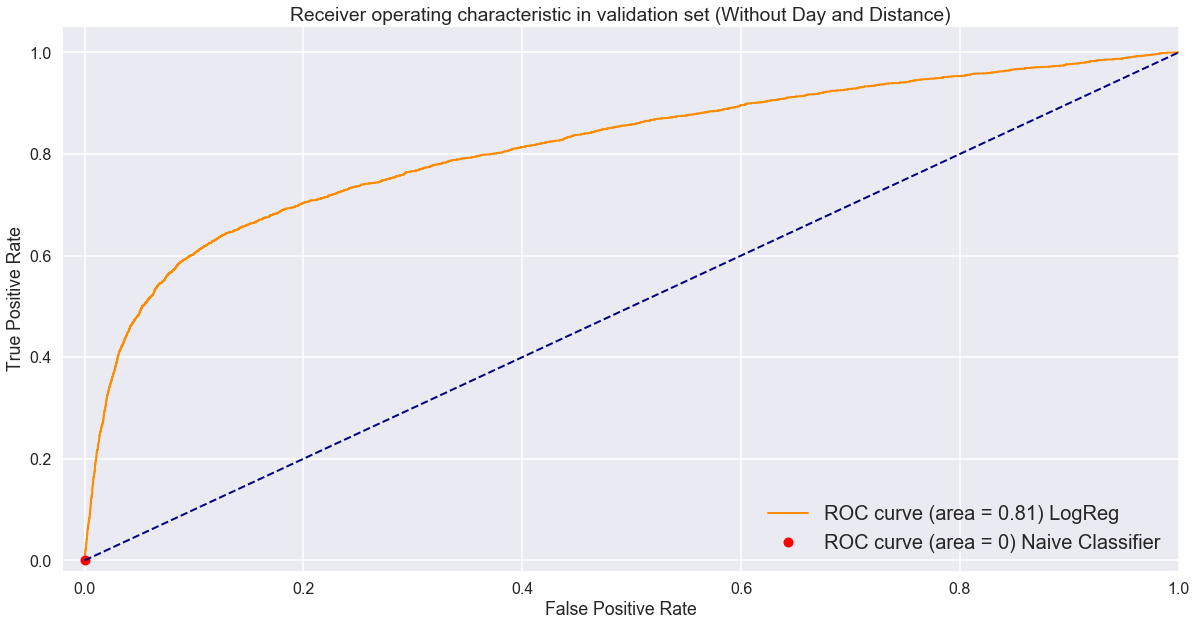

In [59]:
logregcv8 = LogisticRegressionCV(Cs=cvals,refit=True,cv=5,fit_intercept=True,penalty='l2')
logregcv8.fit(X_train8, y_train)
print('Best C value:', logregcv8.C_)
plot_ROC(X_valid8, y_valid, logregcv8, 'validation set (Without Day and Distance)')

### Final Model without Day, Distance, Destination and Origin Airport

In [60]:
#Check w/o origin airport to make life easier
categorical_columns_g2cols = ['MONTH', 'DAY_OF_WEEK', 'AIRLINE']
train8 = pd.get_dummies(train, columns=categorical_columns_g2cols, drop_first=True)
valid8 = pd.get_dummies(valid, columns=categorical_columns_g2cols, drop_first=True)
test8 = pd.get_dummies(test, columns=categorical_columns_g2cols, drop_first=True)
X_train9 = train8.loc[:, ~train8.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT'])] 
X_valid9 = valid8.loc[:, ~valid8.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT'])]  
X_test9 = test8.loc[:, ~test8.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT'])]  

Best C value: [ 10.]


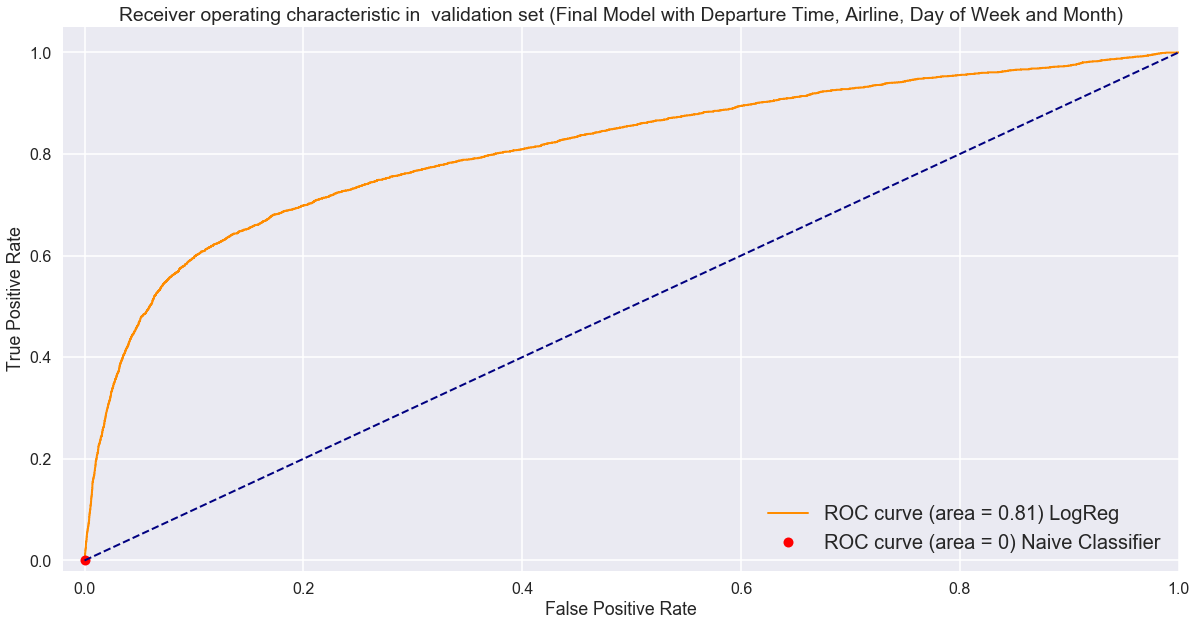

In [61]:
logregcv9 = LogisticRegressionCV(Cs=cvals,refit=True,cv=5,fit_intercept=True,penalty='l2')
logregcv9.fit(X_train9, y_train)
print('Best C value:', logregcv9.C_)
plot_ROC(X_valid9, y_valid, logregcv9, ' validation set (Final Model with Departure Time, Airline, Day of Week and Month)')

In [62]:
X_train9.shape

(90910, 31)

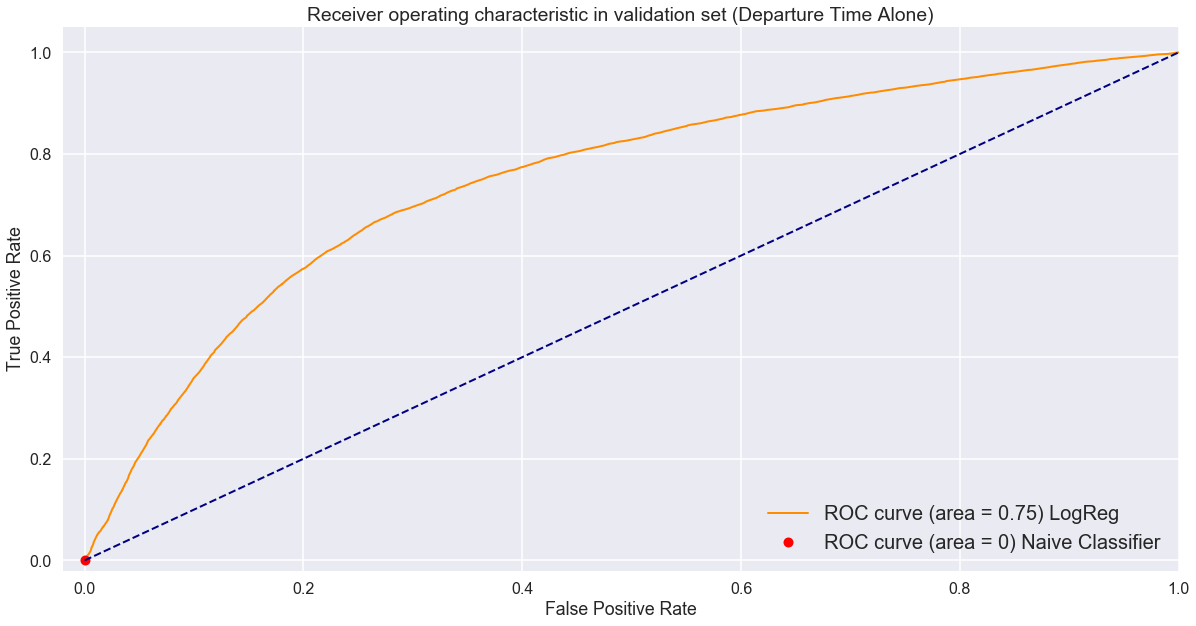

In [63]:
#Check that Departure Time alone is not just as good
X_train10 = train['DEP_TIME'].values.reshape(-1,1)
y_train = train['DELAY_OR_NOT']
X_test10 = test['DEP_TIME'].values.reshape(-1,1)
y_test = test['DELAY_OR_NOT']
logregcv10 = LogisticRegressionCV(Cs=cvals,refit=True,cv=5,fit_intercept=True,penalty='l2')
logregcv10.fit(X_train10, y_train)
plot_ROC(X_test10, y_test, logregcv10, 'validation set (Departure Time Alone)')

### kNN Model -- Determined best k and features from scoring in validation set

In [64]:
# kNN Model using Final Logistic Model Predictors: 
# Departure Time, Airline, Day of Week, and Month
# max_score_0 = 0
# max_k_0 = 0 


# for k in range(1,10):
#     knn_0 = KNN(n_neighbors = k)
#     score = cross_val_score(knn_0,X_train9,y_train).mean()
#     if score > max_score_0:
#         max_k_0 = k
#         max_score_0 = score
 

knn = KNN(n_neighbors = 20)
knn.fit(X_train9,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [65]:
print('KNN Mean Accuracy in Validation k=20:\n',
      'with Departure Time, Airline, Day of Week and Month:',  knn.score(X_valid9,y_valid))

KNN Mean Accuracy in Validation k=20:
 with Departure Time, Airline, Day of Week and Month: 0.906774831551


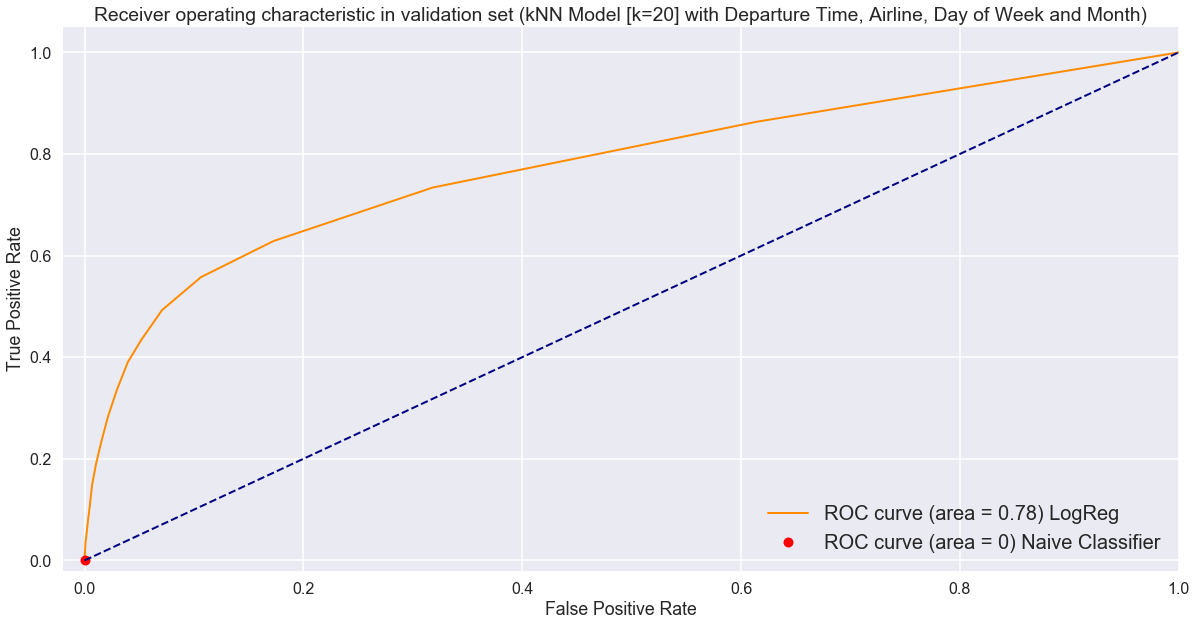

In [66]:
plot_ROC(X_valid9, y_valid, knn, 'validation set (kNN Model [k=20] with Departure Time, Airline, Day of Week and Month)')

# 5. Given your model, comment on the importance of factors as related to whether a flight is delayed.

Scheduled departure time is probably the strongest predictor of whether a flight is delayed.  The later the flight, the more likely it is to be delayed. Airline and month are probably the next most important predictors, followed by day of week and then possibly origin airport. Distance, day of the month, and arrival airport do not appear to be important.

# 6. Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set.

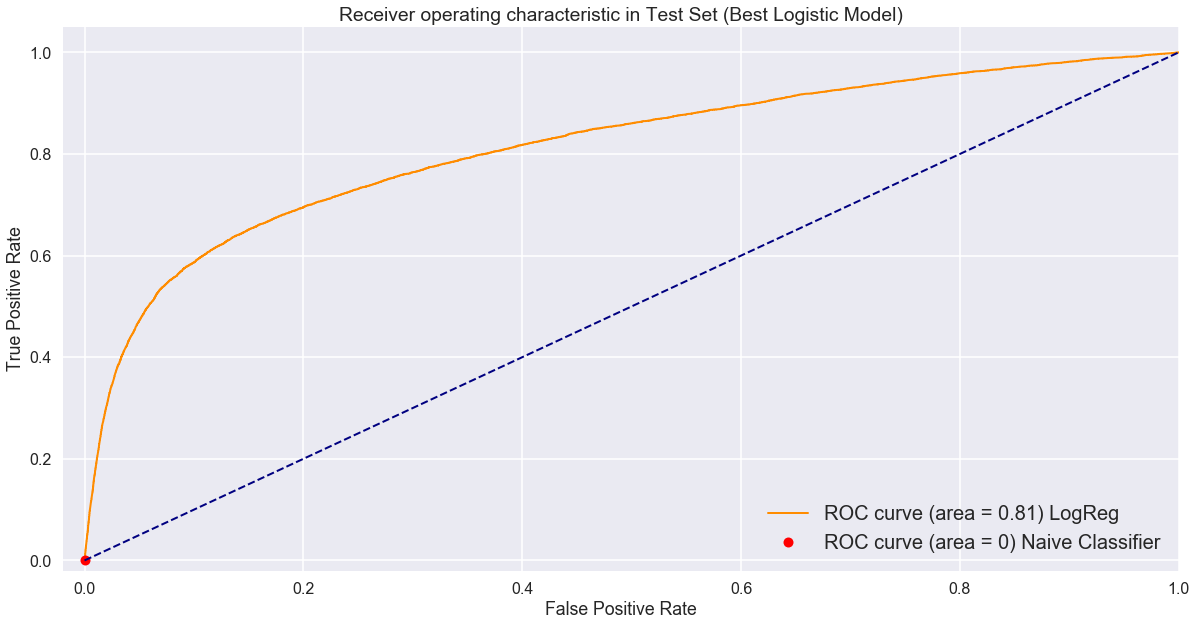

In [67]:
plot_ROC(X_test9, y_test, logregcv9, 'Test Set (Best Logistic Model)')

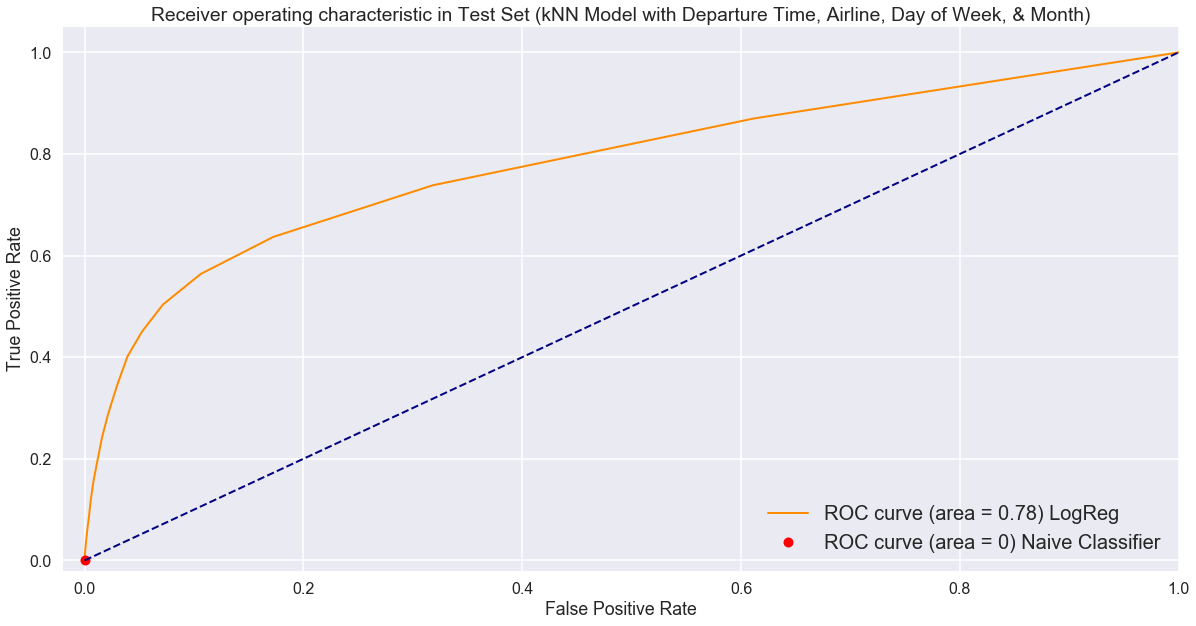

In [68]:
plot_ROC(X_test9, y_test, knn, 
         'Test Set (kNN Model with Departure Time, Airline, Day of Week, & Month)')

#### Final Model is logistic regression with month, day of week, airline and departure time:

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


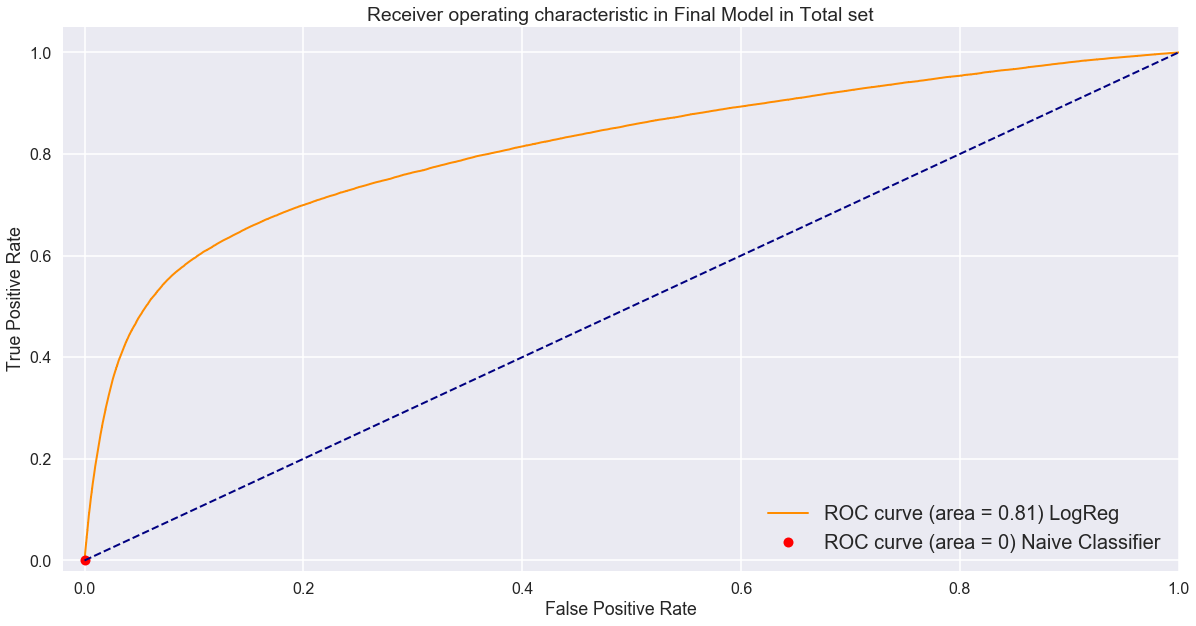

In [69]:
total[numerical_columns] = (total[numerical_columns] - mean)/std
categorical_columns_g2cols = ['MONTH', 'DAY_OF_WEEK', 'AIRLINE']
total1 = pd.get_dummies(total, columns=categorical_columns_g2cols, drop_first=True)
X_total = total1.loc[:, ~total1.columns.isin(['DELAY_OR_NOT', 'DAY', 'DISTANCE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT'])]  
y_total = total1['DELAY_OR_NOT']
plot_ROC(X_total, y_total, logregcv9, 'Final Model in Total set')

In [71]:
tpreds = logregcv9.predict_proba(X_total)[:,1]
total['YPRED'] = tpreds

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


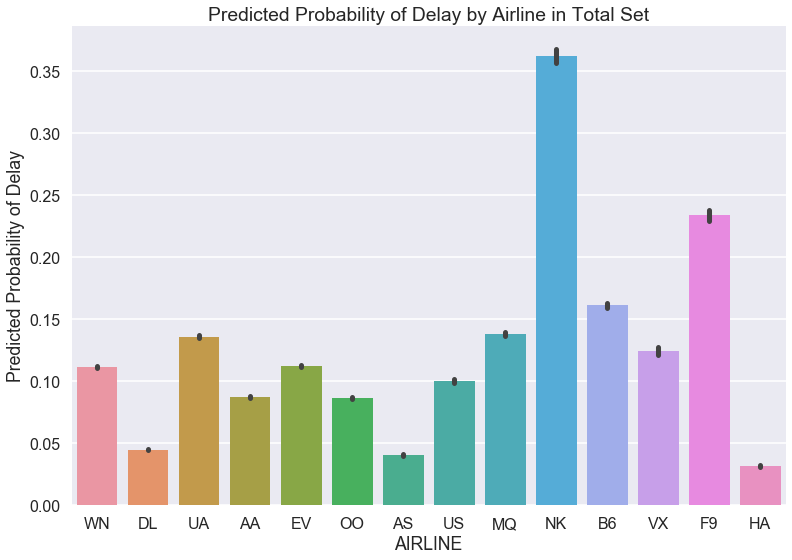

In [72]:
ax = plt.axes()
sns.barplot(x="AIRLINE", y="YPRED", data=total);
#sns.barplot(x="AIRLINE", y="DELAY_OR_NOT", data=total, ax=1); #prediction and reality extremely close
ax.set_ylabel('Predicted Probability of Delay')
ax.set_title('Predicted Probability of Delay by Airline in Total Set')
plt.show()

NK is predicted to have the most delays, followed by F9 and B6. <br>HA, AS and DL have relatively low predicted probabilites of delay.

# 7. Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.


In [73]:
#restrict to delayed flights
df2 = df[df.DELAY_OR_NOT == 1]
df3 = df2.reset_index()
df3.head()

,index,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,DEP_TIME,ARR_TIME,ORIGIN_AP_CAT,DEST_AP_CAT
0,19,2015-01-04,1,4,7,WN,958,N211WN,PHL,ATL,...,11.0,0.0,20.0,101.0,0.0,1,1115,1250,Other,ATL
1,25,2015-07-22,7,22,3,EV,2682,N678AE,BRO,DFW,...,0.0,0.0,0.0,98.0,0.0,1,1053,1160,Other,Other
2,28,2015-03-23,3,23,1,OO,4629,N554CA,LAS,SEA,...,0.0,0.0,0.0,128.0,0.0,1,1095,1262,Other,Other
3,54,2015-03-12,3,12,4,US,2146,N951UW,LGA,BOS,...,38.0,0.0,0.0,0.0,0.0,1,840,903,Other,BOS
4,59,2015-04-27,4,27,1,EV,2557,N673AE,SHV,DFW,...,8.0,0.0,95.0,45.0,0.0,1,1001,1065,Other,Other


In [74]:
df3.drop(['index', 'DELAY_OR_NOT'], axis=1, inplace=True)

In [75]:
df3 = df3.assign(ln_ARR_DELAY = lambda x: np.log(x.ARRIVAL_DELAY))

In [76]:
df3[['ARRIVAL_DELAY', 'ln_ARR_DELAY']].head()

,ARRIVAL_DELAY,ln_ARR_DELAY
0,132.0,4.882802
1,98.0,4.584967
2,128.0,4.852030
3,38.0,3.637586
4,148.0,4.997212


In [77]:
train2, test2, total2 = train_validate_test_split(df3, seed=9001)

In [78]:
train2.columns

Index(['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP',
       'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEP_TIME',
       'ARR_TIME', 'ORIGIN_AP_CAT', 'DEST_AP_CAT', 'ln_ARR_DELAY'],
      dtype='object')

# Visualize Predictors with Continuous Outcome (If Delayed, Predict Length of Delay) (3b)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


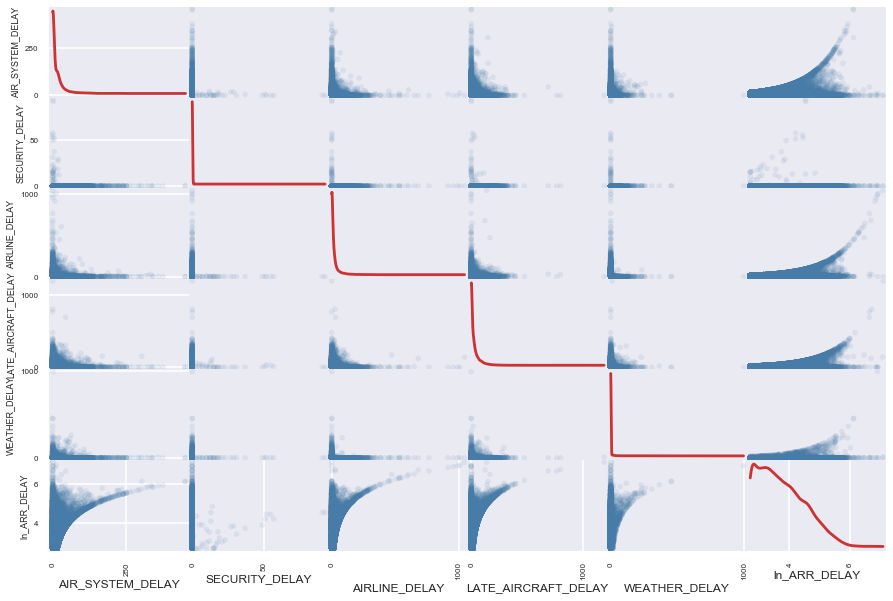

In [79]:
fig2, ax2 = plt.subplots(1,1, figsize=(15,10))
axes = scatter_matrix(train2[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY','AIRLINE_DELAY', 
                              'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ln_ARR_DELAY',]],
                              alpha=0.1, color='C9', diagonal='kde', ax=ax2)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 9)
savefig('image4.png')
plt.show()


In [80]:
def plot_relevant_question(dataframe, ax, labels_to_use, criteria_label, criteria, boolean_query=True):
    df = dataframe.copy()
    
    if boolean_query:
        df['column_of_interest'] = df[criteria_label].isin(criteria)
        for g, group in df.groupby('column_of_interest'):
            group['ln_ARR_DELAY'].plot(kind='hist', ax=ax, alpha=0.3, label = labels_to_use[g])
        ax.legend(loc='best')
        
    else:
        for i, (g, group) in enumerate(df.groupby(criteria_label)):
            group['ln_ARR_DELAY'].plot(kind='hist', ax=ax[i], bins=10, alpha=0.3, label = labels_to_use[i])
            ax[i].axvline(group['ln_ARR_DELAY'].median(), 0, .98, color='black', label='Median')
            ax[i].legend(loc='best')
            ax[i].set_title(labels_to_use[i])

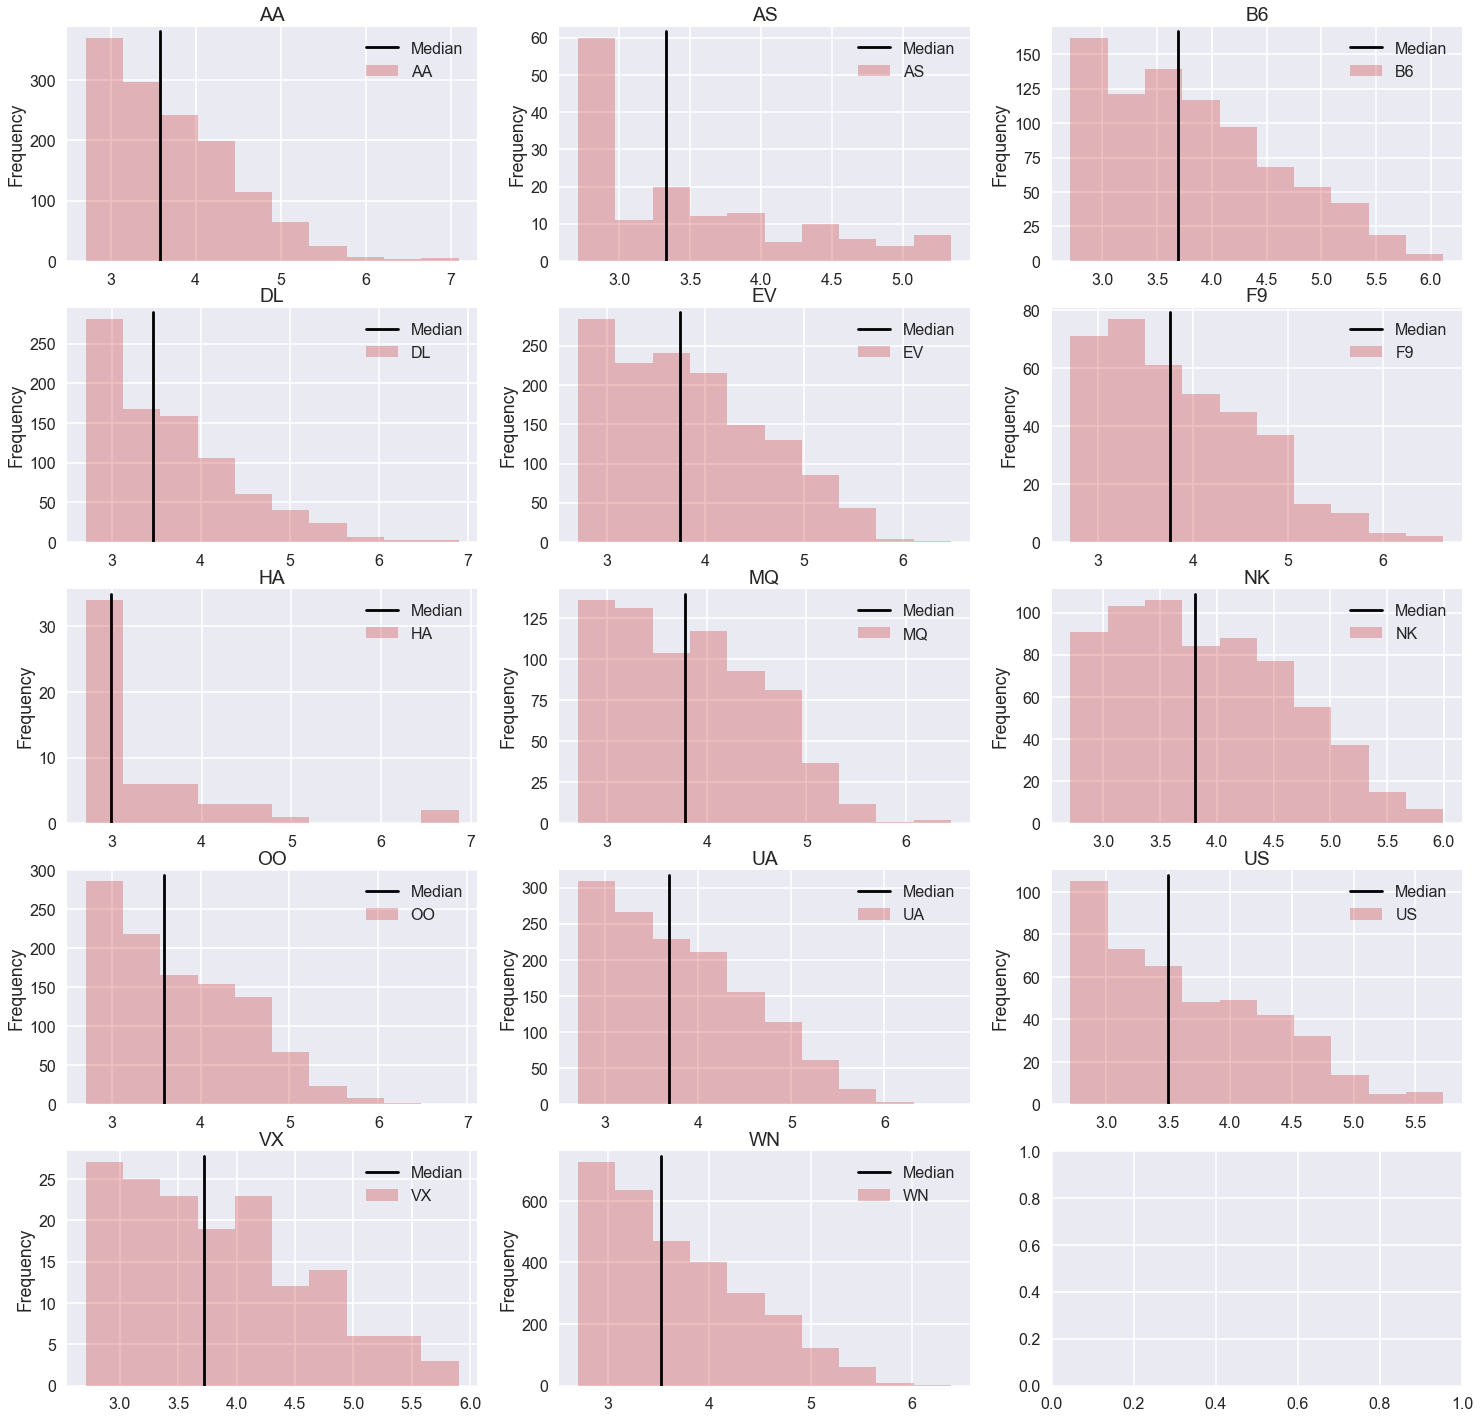

In [81]:
fig, ax = plt.subplots(5,3,figsize=(25,25))
ax = ax.flatten()
plot_relevant_question(train2, ax, ['AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US',
        'VX', 'WN'], 'AIRLINE', None, False)

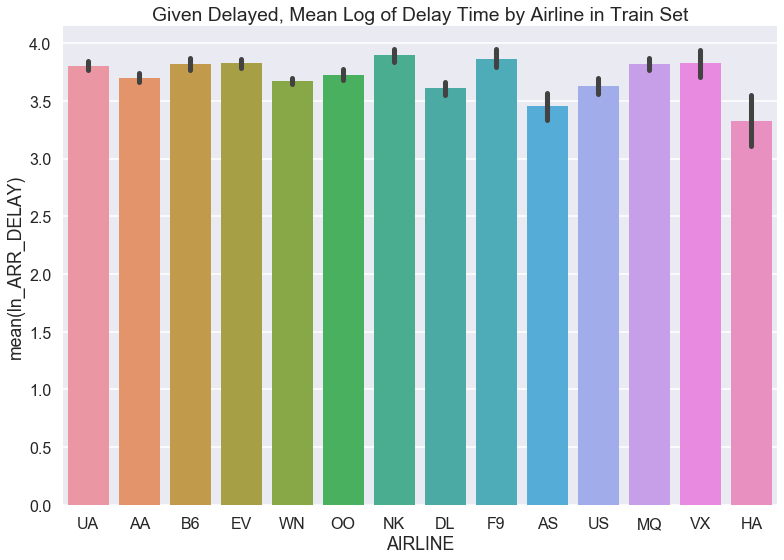

In [82]:
ax = plt.axes()
sns.barplot(x="AIRLINE", y="ln_ARR_DELAY", data=train2);
#sns.barplot(x="AIRLINE", y="DELAY_OR_NOT", data=total, ax=1);
ax.set_title('Given Delayed, Mean Log of Delay Time by Airline in Train Set')
plt.show()

In [83]:
numerical_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE',
                     'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                     'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','DEP_TIME']
mean = train2[numerical_columns].mean()
std = train2[numerical_columns].std()

train2[numerical_columns] = (train2[numerical_columns] - mean)/std
test2[numerical_columns] = (test2[numerical_columns] - mean)/std
total2[numerical_columns] = (total2[numerical_columns] - mean)/std

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [84]:
train2.columns

Index(['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP',
       'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEP_TIME',
       'ARR_TIME', 'ORIGIN_AP_CAT', 'DEST_AP_CAT', 'ln_ARR_DELAY'],
      dtype='object')

In [85]:
categorical_columns_g2cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AP_CAT', 'DEST_AP_CAT']

train2_cat = pd.get_dummies(train2, columns=categorical_columns_g2cols, drop_first=True)
test2_cat = pd.get_dummies(test2, columns=categorical_columns_g2cols, drop_first=True)
total2_cat = pd.get_dummies(total2, columns=categorical_columns_g2cols, drop_first=True)

In [86]:
def step_forwards_backwards(df, train_df, response_var, direction='forward'):
    
    assert direction in ['forward', 'backward']
    
    y = df[response_var].values.reshape(-1,1)

    predictors = set(train_df.drop(['DEPARTURE_DELAY', 'ARRIVAL_DELAY','ln_ARR_DELAY', 'DATE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP',
       'SCHED_ARR'], axis=1).columns)
    selected_predictors = set() if direction=='forward' else set(predictors)
    
    n = df.shape[0]
    best_bic = np.inf
    
    best_bics = []
    best_models = []
    
    if direction == 'forward':
        X = np.ones(n).reshape(-1,1)
        X = np.concatenate([X, train_df[list(selected_predictors)].values], axis=1)
        while (True):
            
            possible_bic_scores = []
            possible_predictors = list(selected_predictors ^ predictors)
            
            if len(possible_predictors) == 0:
                break
                
            for predictor in possible_predictors:
                
                x_temp = np.concatenate([X, train_df[predictor].values.reshape(-1,1)], axis=1)
                model = OLS(endog=y, exog=x_temp).fit()
                bic = model.bic
                possible_bic_scores.append(bic)
                
            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix]
            
            best_bic = np.min(possible_bic_scores)
            best_bics.append(best_bic)
            
            selected_predictors.add(best_predictor)            
            X = np.concatenate([X, train_df[best_predictor].values.reshape(-1,1)], axis=1)
            best_models.append(list(selected_predictors))

    else:

        while (True):
            possible_bic_scores = []
            possible_predictors = list(selected_predictors)

            if len(possible_predictors) == 0:
                break

            for predictor in possible_predictors:
                X = np.concatenate([np.ones(n).reshape(-1,1), train_df[list(selected_predictors - set([predictor]))].values], axis=1)
                model = OLS(endog=y, exog=X).fit()
                bic = model.bic
                possible_bic_scores.append(bic)

            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix] 

            best_bic = possible_bic_scores[best_predictor_ix]
            selected_predictors.discard(best_predictor)
            
            best_bics.append(best_bic)
            best_models.append(list(selected_predictors))
            
    index_of_best_bic = np.argmin(best_bics)

    return best_models[index_of_best_bic]

In [87]:
best_predictors = step_forwards_backwards(train2_cat, train2_cat, 'ln_ARR_DELAY')
best_predictors

['AIRLINE_DELAY',
 'AIRLINE_AS',
 'SECURITY_DELAY',
 'AIRLINE_MQ',
 'AIRLINE_HA',
 'AIR_SYSTEM_DELAY',
 'MONTH_6',
 'ORIGIN_AP_CAT_Other',
 'MONTH_7',
 'LATE_AIRCRAFT_DELAY',
 'AIRLINE_EV',
 'WEATHER_DELAY',
 'AIRLINE_DL',
 'AIRLINE_NK',
 'DEP_TIME']

In [88]:
X_train = train2_cat[best_predictors]
y_train = train2_cat['ln_ARR_DELAY']
X_test = test2_cat[best_predictors]
y_test = test2_cat['ln_ARR_DELAY']
X_total = total2_cat[best_predictors]
y_total = total2_cat['ln_ARR_DELAY']

In [89]:
#Fit linear model using best predictors chosen from forward stepwise selection
line = LinearRegression(fit_intercept=True)
line.fit(X_train, y_train)
y_pred = line.predict(X_train)

#R^2 of fit
print('R^2 in Train:', line.score(X_train, y_train))
print('R^2 in Test:', line.score(X_test, y_test))
print('R^2 in Total:', line.score(X_total, y_total))
#Residuals
res = y_train - y_pred

R^2 in Train: 0.747514900451
R^2 in Test: 0.760674875427
R^2 in Total: 0.765600662631


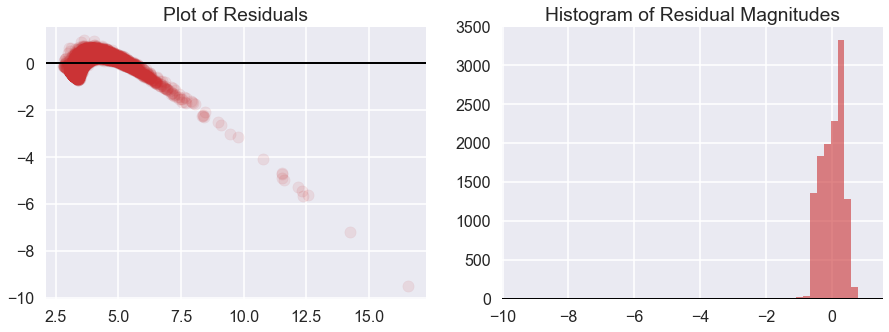

In [90]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Plot of Residuals')
axes[0].scatter(y_pred, res, alpha=.1)#y_pred - y_train[:,0])
axes[0].axhline(0, c='black', lw=2)

axes[1].set_title('Histogram of Residual Magnitudes')
axes[1].hist(res, bins=50, alpha=0.6)
axes[1].axhline(0, c='black', lw=2)
plt.show()

Linear regression is appropriate when the histogram of the residual is normal (indicating that noise is normal). The histogram shows that the residuals are possibly not normally distributed. The plot of the residuals on the left shows a clear pattern of the residuals, showing it is not meet the requirement for homoskedasticity. Will be better to use non-parametric approach given the data

### KNN - Final Continuous Model

In [91]:

max_score = 0
max_k = 0 


for k in range(1,26):
    knn = KNN1(n_neighbors = k)
    score = cross_val_score(knn,X_train,y_train).mean()
    if score > max_score:
        max_k = k
        max_score = score
 

knn = KNN1(n_neighbors = max_k)
knn.fit(X_train,y_train)

print('KNN R^2 in Test:', '(Best K is ' + str(max_k) +')',  knn.score(X_test,y_test))
print('KNN R^2 in Total:',  knn.score(X_total,y_total))

KNN R^2 in Test: (Best K is 3) 0.951628794708
KNN R^2 in Total: 0.955251925682


KNN performs much better in the test and total set with an $R^2$ of .95 in the test and .96 in the total set.

# 8. Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

For the final model to classify 'Delay' vs. 'No Delay', the following variables are included in a logistic regression model and were found to be highly correlated with delays:<b> month, day of the week, airline, and scheduled departure time.</b> <img src="image1.png">A model with these four predictors has an AUC of .81 in the total (minus test and train) set, and performs fairly well at predicting delayed vs. non-delayed flights. All variables that exist only for a delayed flight were dropped, and I did not consider DEPARTURE_DELAY because this is not very helpful at predicting delays well in advance. Because of collinearity concerns between DATE with DAY, MONTH, and DAY OF WEEK, I dropped DATE, as day, month and day of week are likely more helpful (from an interpretation perspective) for future prediction. Also, due to high collinearity between DISTANCE, SCHEDULED_TIME, and ELAPSED_TIME, I only considered distance in models, but this was dropped after AUC did not change from the model including DISTANCE, and the model without it. DAY also did not change the AUC and was dropped from the logistic regression model. TAIL_NUMBER also incorporates details from AIRLINES, DAY_OF_WEEK, SCHEDULED_TIME, DEPARTURE_TIME, etc. and was considered in a logistic regression separately, but performed worse based on an AUC of .75 in the validation set. Polynomials and interaction terms were not considered. Other methods including LDA, QDA and Decision Trees were considered only in the first preliminary phase due to time constraints, but would be compared in the test set after optimizing using cross validation given more time to address the question. kNN was also performed and optimal feature selection & $k$ were decided in the validation set and then the best combination observed was compared using test set AUCs to the best logistic regression. The logistic regression performed slightly better with an AUC of 0.81 compared to 0.78. <img src="image3small.png">
For the continuous delay time question, the delay types appeared strongly associated with the log arrival delay time, though security delays were less clearly associated: <img src="image4.png">

Forward stepwise regression was performed to obtain the most important predictors from the set of possible predictors: 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE','DISTANCE','SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY','AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',  'DEPARTURE_TIME'. Again, TAIL_NUMBER was excluded because it contains information already covered in AIRLINES, DAY_OF_WEEK, DEPARTURE_TIME, etc., which contain fewer categories and for which results are easier to interpret. Therefore TAIL_NUMBER and FLIGHT_NUMBER were dropped in order to be able to run the forward stepwise selection in a timely matter and because most of the information captured by these variables are expected to be captured by other included variables. Variables were selected in the forward stepwise regression based on the lowest BIC values. The best predictor variables selected were: ['MONTH_6',
 'AIRLINE_HA',
 'AIRLINE_DELAY',
 'AIRLINE_AS',
 'AIR_SYSTEM_DELAY',
 'MONTH_7',
 'SECURITY_DELAY',
 'WEATHER_DELAY',
 'AIRLINE_MQ',
 'DEP_TIME',
 'AIRLINE_NK',
 'ORIGIN_AP_CAT_Other',
 'AIRLINE_EV',
 'AIRLINE_DL',
 'LATE_AIRCRAFT_DELAY']. This model has an $R^2$ of 0.75 in the test set and 0.77 in the total set. After looking at the residuals, it was determined that the assumption of heteroskadicity and normally distributed residuals appeared violated. The variables selected from the forward selection model (<b>the departure time, many of the airlines and months, an origin airport comparison, and all of the types of delays</b>) were then applied to K-NN regression where 3-fold cross validation was performed to obtain an optimal k=3. KNN performed much better in the test and total set with an  $R^2$  of .95 in the test and .96 in the total set.
